### Chapter 6.1
# Recurrence Time Distribution of Discrete-Time Renewal Processes
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---


The forward recurrence time $ R $ of discrete-time renewal processes is defined as the time interval from a random observation time $ t^* $ to the next arrival. The observation instant lies also at the equidistant time instants on the discretized time axis. Here we distinguish between two cases: the observation instant is considered to be immediately *before* or *after* a discretized time instant.

## Observation prior to discretized time instants
A discrete-time renewal process  is viewed from a random time $t^\ast$ by an independent outside observer. It is assumed that the observation time $ t^\ast$ is immediately before a time instant of the discretized time axis. If an arrival occurs at the same time as the observation, the forward recurrence time is zero. The distribution of the discrete-time forward recurrence time is:

$ \displaystyle 
r(k) =  \frac{1}{E[A]} \Big( 1 - \sum_{i=0}^{k} a(i)\Big) \; , \quad k =0,1,\dots \;,
$

for the interarrival time $A$ being a discrete random variable.

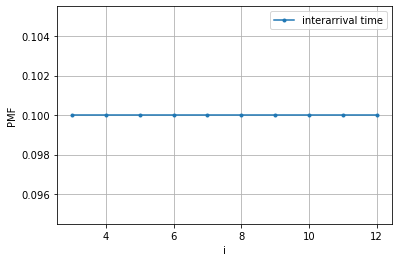

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from discreteTimeAnalysis import *

A = DU(3,12)
A.plotPMF(label='interarrival time')
plt.xlabel('i')
plt.ylabel('PMF')
plt.legend();
plt.grid(which='major');

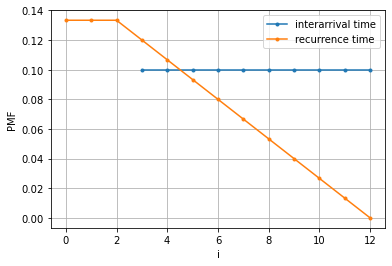

In [9]:
ks = np.arange(A.xmax+1) # value range of the recurrence time
rk = np.zeros(len(ks)) # probabilities

for k in ks:
    rk[k] = (1-A.cdf(k))/A.mean()

R = DiscreteDistribution(ks, rk)    

A.plotPMF(label='interarrival time')
R.plotPMF(label='recurrence time')
plt.xlabel('i')
plt.ylabel('PMF')
plt.legend();
plt.grid(which='major');

## Observation just after discretized time instants
Now the observation time $ t^\ast$ is located immediately after a time instant of the discretized time axis.
The distribution of the forward recurrence time $R$ is 

$\displaystyle
r(k) = \frac{1}{E[A]} (1 - \sum_{i=0}^{k-1} a(i)) \;, \quad k =1,2,\dots \;,$
for the interarrival time $A$.

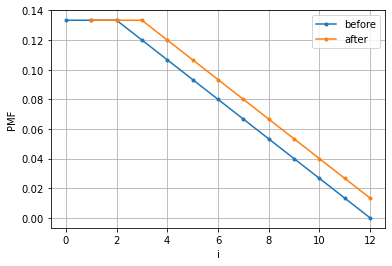

In [10]:
ks = np.arange(1,A.xmax+1) # value range of the recurrence time
rk = np.zeros(len(ks)+1) # probabilities

for k in ks:
    rk[k] = (1-A.cdf(k-1))/A.mean()

R_after = DiscreteDistribution(ks, rk[1:])    

#A.plotPMF(label='interarrival time')
R.plotPMF(label='before')
R_after.plotPMF(label='after')
plt.xlabel('i')
plt.ylabel('PMF')
plt.legend();
plt.grid(which='major');